# Introduction
Because I want to learn both Python and R simutaneously, I will try to do the assignment on both R and Python

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Plot 30-day mortality rates for heart attack

In [10]:
outcome = pd.read_csv("outcome-of-care-measures.csv")
print(outcome.shape)
print(type(outcome))
print(outcome.columns)

(4706, 46)
<class 'pandas.core.frame.DataFrame'>
Index(['Provider Number', 'Hospital Name', 'Address 1', 'Address 2',
       'Address 3', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number',
       'Hospital 30-Day Death (Mortality) Rates from Heart Attack',
       'Comparison to U.S. Rate - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
       'Lower Mortality Estimate - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
       'Upper Mortality Estimate - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
       'Number of Patients - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
       'Footnote - Hospital 30-Day Death (Mortality) Rates from Heart Attack',
       'Hospital 30-Day Death (Mortality) Rates from Heart Failure',
       'Comparison to U.S. Rate - Hospital 30-Day Death (Mortality) Rates from Heart Failure',
       'Lower Mortality Estimate - Hospital 30-Day Death (Mortality) Rates from Heart Failure',
       'Upper Mortalit

<AxesSubplot:ylabel='Frequency'>

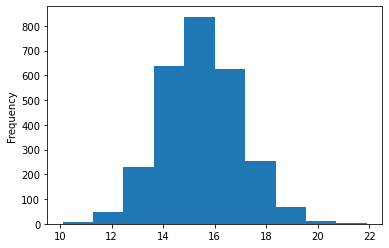

In [44]:
column10 = outcome[[outcome.columns[10]]].replace('Not Available', np.nan)
column10 = pd.to_numeric(column10[outcome.columns[10]])
column10.plot.hist()

## Finding the best hospital in a state

In [26]:
# We notice that the column in which contains the mortality rate of the three diesease are 10, 16, 22
# Beacause of that we construct a dict that accumulate all these place
import pandas as pd
ref = {"heart attack": 'Hospital 30-Day Death (Mortality) Rates from Heart Attack', 
        "heart failure": 'Hospital 30-Day Death (Mortality) Rates from Heart Failure',
         "pneumonia": 'Hospital 30-Day Death (Mortality) Rates from Pneumonia'}

def best(state, outcome):

    # Check if this is a valid outcome
    if(outcome not in ref):
        print('invalid outcome')
        return
    full_term = ref[outcome]
    # Read the csv file
    df = pd.read_csv("outcome-of-care-measures.csv")

    # Check if the state is valid
    state_list = pd.unique(df.State)
    if(state not in state_list):
        print("invalid state")
        return

    # Return hospital name in that state with lowest 30-day death
    # Eleminating all the unnecessary row
    sub_df = df[df.State.isin([state])]
    # Take the Hospital name and the statistic column
    sub_df = sub_df[['Hospital Name', full_term]]

    result = sub_df[sub_df[full_term] <= min(sub_df[full_term])]

    result = sorted(result['Hospital Name'].tolist())

    print(result)


best('MD', 'pneumonia')

['CALVERT MEMORIAL HOSPITAL', 'HOWARD COUNTY GENERAL HOSPITAL']


In [11]:
outcome.State

0       AL
1       AL
2       AL
3       AL
4       AL
        ..
4701    TX
4702    TX
4703    TX
4704    TX
4705    TX
Name: State, Length: 4706, dtype: object